# Neural network with 1 hidden layer
Done by Srujan: 200240128033

In [1]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score
from sklearn import datasets
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [2]:
def generate_data(noise):
    X,y = datasets.make_moons(n_samples=1000,shuffle=True,random_state=42,noise=noise)
    return X,y

In [3]:
class NeuralNetwork:
    
    def __init__(self,X,hidden_layer_size,y,l_rate,reg_lambda):
        
        self.X = X
        self.y = y
        
        self.m = self.X.shape[0]  # m is number of samples in the dataset
        self.n = self.X.shape[1] # n in number of independent features
        self.hidden_layer_size = hidden_layer_size
        
        self.l_rate = l_rate  # learning rate 
        self.reg_lambda = reg_lambda # regularization parameter
        
        self.W1 = np.random.rand(self.hidden_layer_size , self.n) # initializing wrights and bias with random numbers
        self.b1 = np.random.rand(1,self.hidden_layer_size)
        self.W2 = np.random.rand(1, self.hidden_layer_size)
        self.b2 = np.random.rand(1,1)
        
    def sigmoid(self,x):
        
        return 1/(1+np.exp(-x)) 
    
    def tanh(self,x):
        
        return ( 1 - np.exp(-2*x) ) / (1 + np.exp(-2*x) )

    def softmax(self,x):
        
        return np.exp(-x)/np.sum(np.exp(-x))
    
    def sigmoid_derivative(self,a):
        
        return a*(1-a)
    
    def tanh_derivative(self,a):
        
        return 1-a**2
    
    def forward_prop(self):
       
        self.Z1 = np.dot(self.X,self.W1.T) + self.b1 
        
        self.A1 = self.tanh(self.Z1)
        
        self.Z2 = np.dot(self.A1,self.W2.T) + self.b2
        
        self.y_hat = self.sigmoid(self.Z2)
        
           
    def backward_prop(self):
        
        self.y = self.y.reshape(self.y_hat.shape) # reshaping y into y_hat's shape to avoid wrong calculations 
        
        self.dZ2 = self.y_hat - self.y 
        
        self.dW2 = np.dot(self.dZ2.T,self.A1)
    
        self.db2 = np.sum(self.dZ2,keepdims=True)
        
        self.dZ1 = np.dot(self.dZ2,self.W2) * self.tanh_derivative(self.A1)
        
        self.dW1 = np.dot(self.dZ1.T,self.X)
        
        self.db1 = np.sum(self.dZ1,keepdims = True)
        
        self.dW2 = self.dW2 + self.reg_lambda * self.W2  / self.m  # regularizing to reduce overfitting 
        self.db2 = self.db2 + self.reg_lambda * self.b2  / self.m 
        self.dW1 = self.dW1 + self.reg_lambda * self.W1  / self.m       
        self.db2 = self.db2 + self.reg_lambda * self.b2  / self.m 
        
        self.W2 = self.W2 - self.l_rate * self.dW2 # updating weights
        self.b2 = self.b2 - self.l_rate * self.db2 # updating bias
        self.W1 = self.W1 - self.l_rate * self.dW1 # updating weights
        self.b1 = self.b1 - self.l_rate * self.db1 # updating bias
        
    def cost(self):
        
        loss = (-1 / self.m) * np.sum( self.y * np.log( self.y_hat ) + (1-self.y) * ( np.log(1-self.y_hat) ) )
        
        loss = loss + (self.reg_lambda / (2*self.m) )*(np.sum(self.W1**2) + \
                                                     np.sum(self.W2**2))
        
        return loss 

    def predict(self,x):
        
        Z1 = np.dot(x,self.W1.T) + self.b1 
        
        A1 = self.tanh(Z1)
        
        Z2 = np.dot(A1,self.W2.T) + self.b2
        
        y_hat = self.sigmoid(Z2)  
        
        preds = [1 if i>0.5 else 0 for i in y_hat]

        return preds
        

# Dataset with noise ratio 0.2

In [4]:
X,y = datasets.make_moons(n_samples=1000,shuffle=True,random_state=42,noise=0.2)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,stratify=y ,random_state=42)

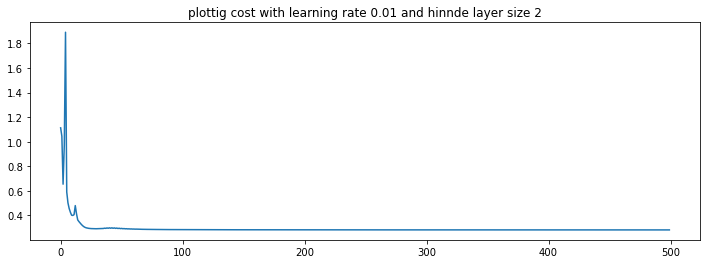

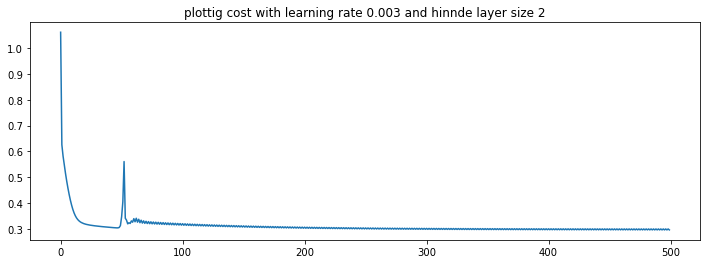

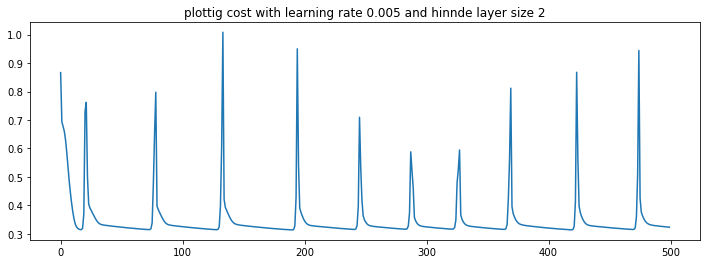

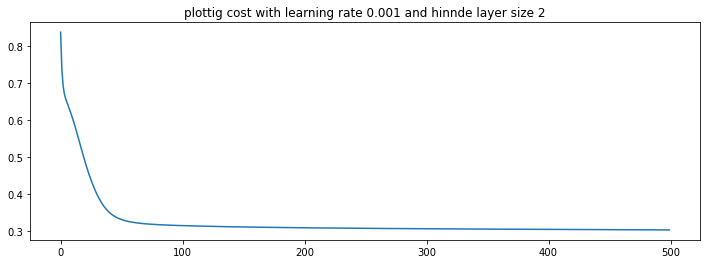

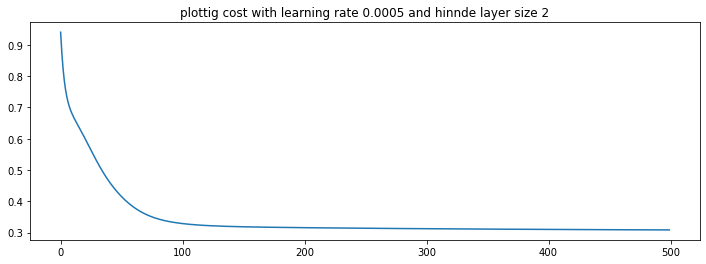

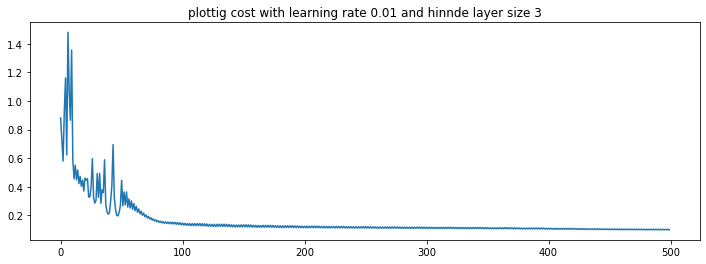

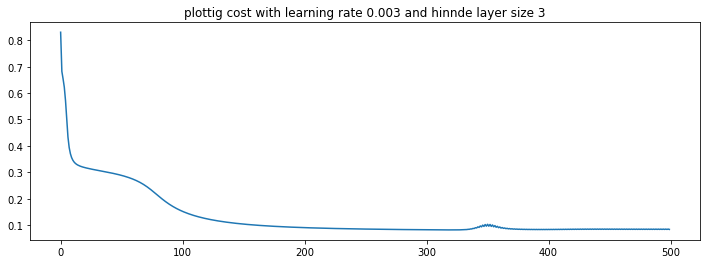

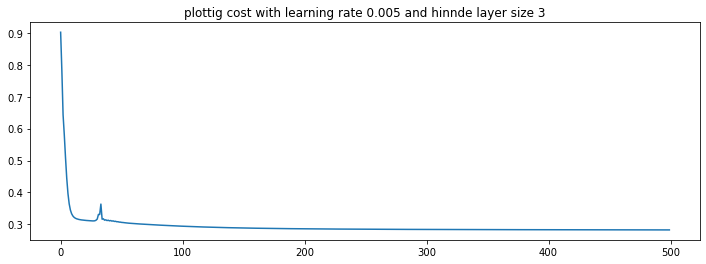

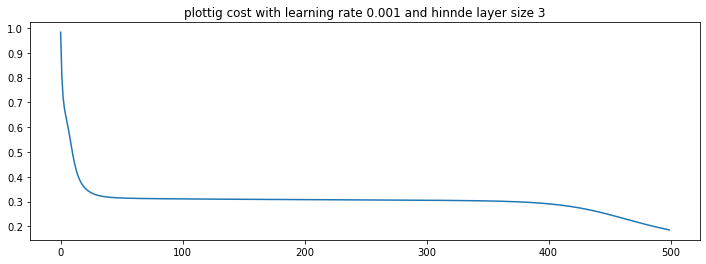

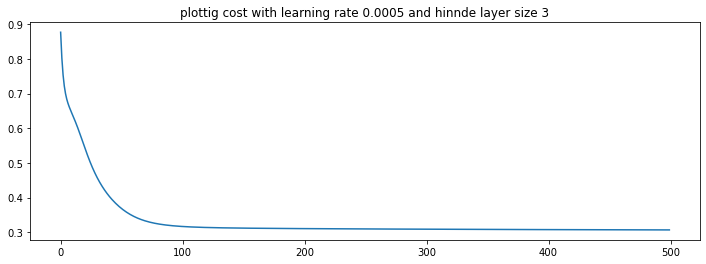

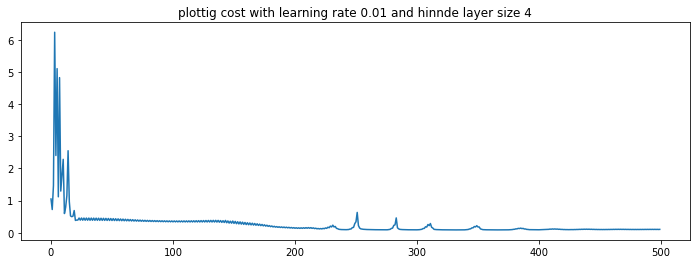

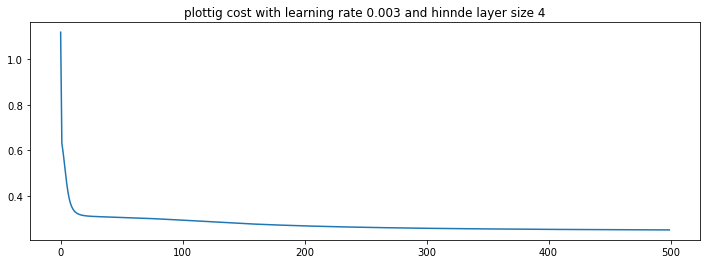

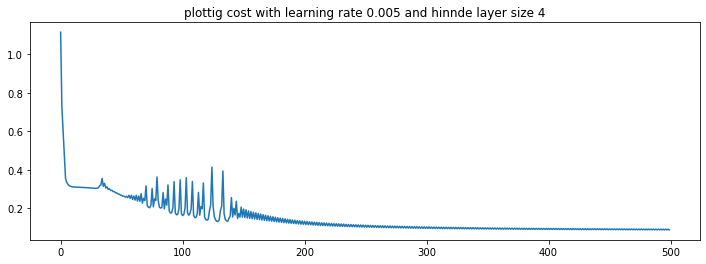

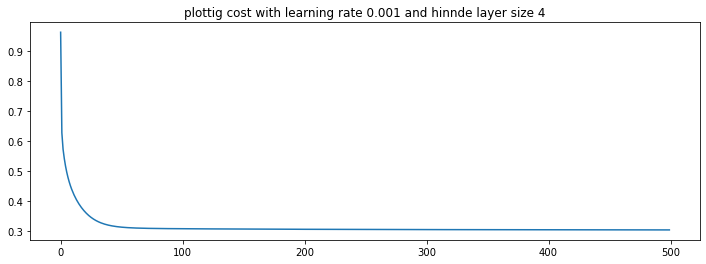

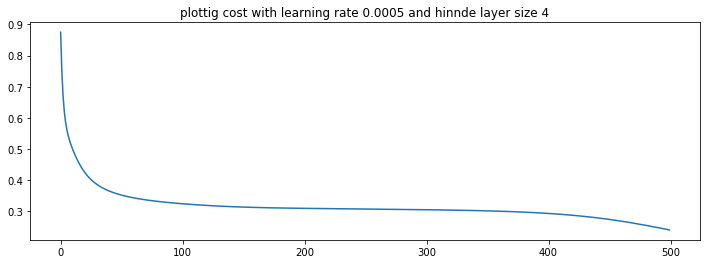

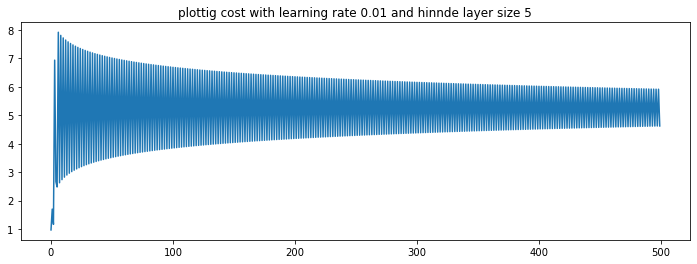

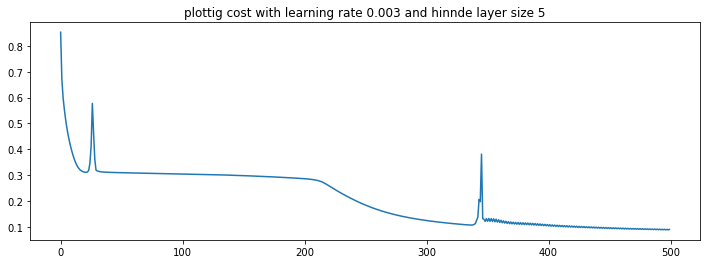

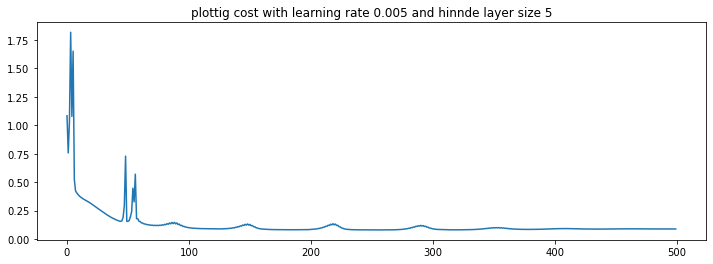

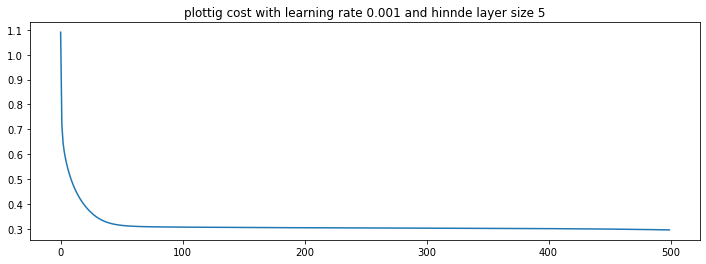

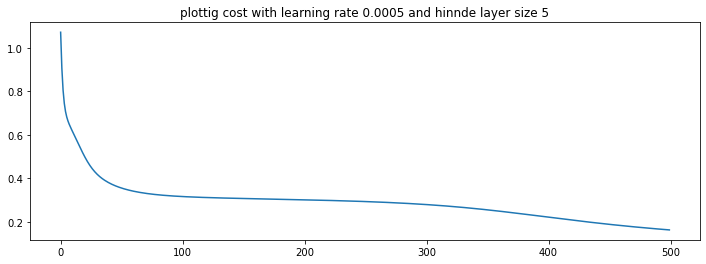

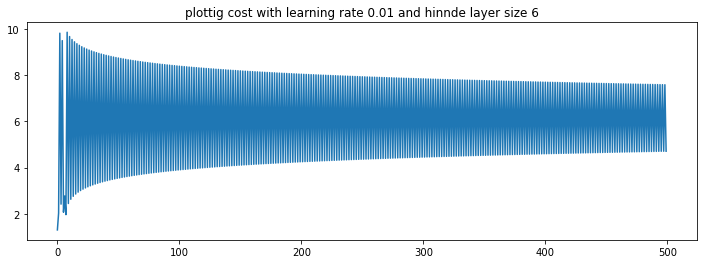

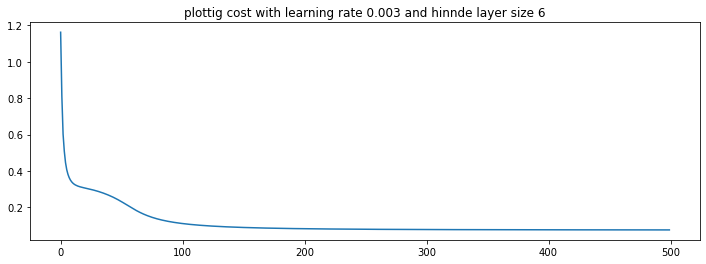

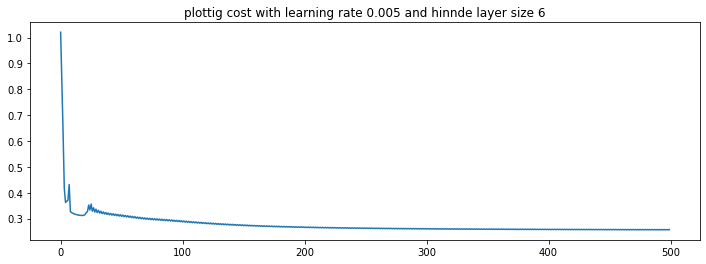

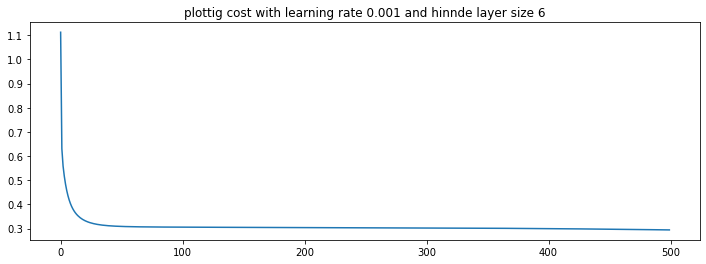

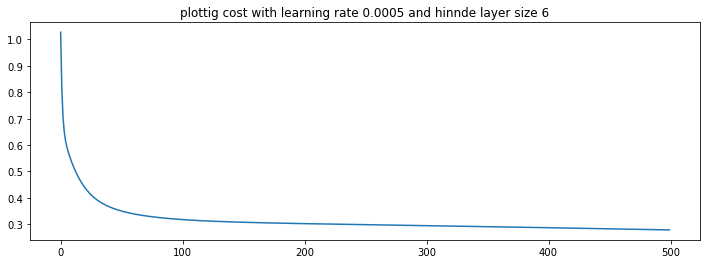

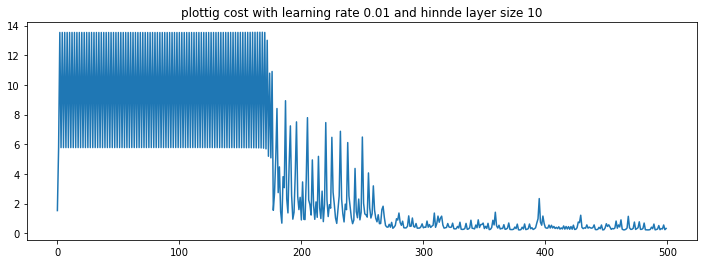

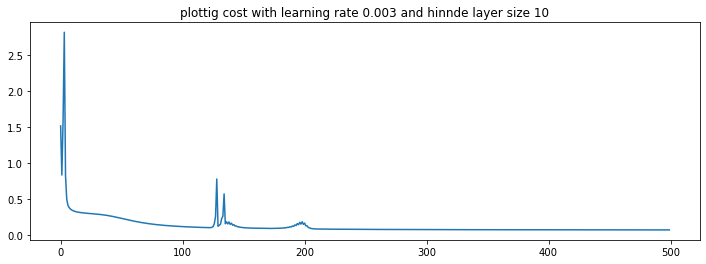

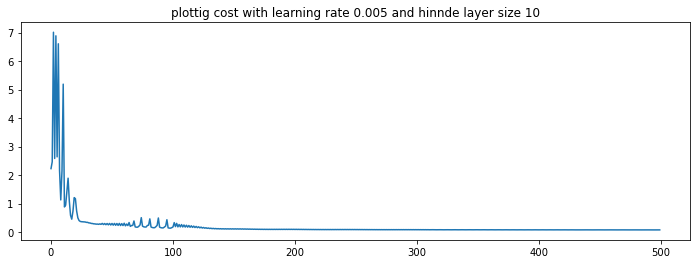

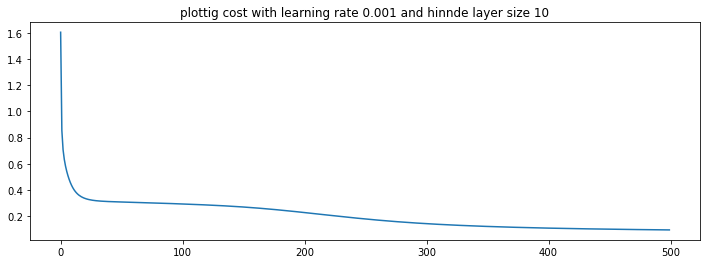

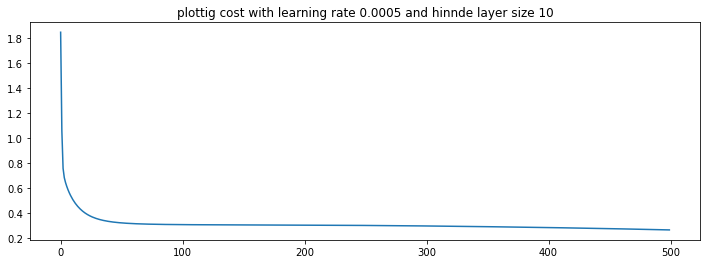

In [5]:
learning_rates = [0.01,0.003,0.005,0.001,0.0005]

metrics = {'learning_rate':[],'hidden_layers':[],'train_accuracy':[],'test_accuracy':[]}

hidden_layers = [2,3,4,5,6,10]

for n in hidden_layers:
    for lr in learning_rates:  # different learning rates

        cost_list = []
        p = NeuralNetwork(X_train,n,y_train,lr,0.003)  # creating object

        for epoch in range(0,500): # training for  500 epochs 

            p.forward_prop() # forward propagation 
            p.backward_prop() # backward propagation 
            cost_list.append(p.cost()) #apending cost after every epoch to a list 

        plt.figure(figsize=(12,4)) # plotting cost for every learning rate
        x_vals = list(range(500))
        sns.lineplot(x=x_vals,y=cost_list)
        plt.title(f'plottig cost with learning rate {lr} and hinnde layer size {n}')

        y_train_preds = p.predict(X_train)  # converting output of sigmoid into predictions

        y_test_preds = p.predict(X_test)

        train_accuracy = accuracy_score(y_train,y_train_preds)
        test_accuracy = accuracy_score(y_test,y_test_preds)

        # adding to dictionary
        metrics['learning_rate'].append(lr)
        metrics['hidden_layers'].append(n)
        metrics['train_accuracy'].append(train_accuracy)
        metrics['test_accuracy'].append(test_accuracy)


In [6]:
metrics = pd.DataFrame(metrics)
metrics

,learning_rate,hidden_layers,train_accuracy,test_accuracy
0,0.0100,2,0.837143,0.870000
1,0.0030,2,0.874286,0.906667
2,0.0050,2,0.857143,0.896667
3,0.0010,2,0.861429,0.896667
4,0.0005,2,0.861429,0.896667
5,0.0100,3,0.964286,0.973333
6,0.0030,3,0.968571,0.980000
7,0.0050,3,0.850000,0.876667
8,0.0010,3,0.937143,0.960000
9,0.0005,3,0.858571,0.896667


For multi class classification I will use softmax activation function in the fnal layer where I will be getting probabilities of each class. I will then select the class which has highest probability.

# Dataset with noise ratio 0.3

In [7]:
X,y = datasets.make_moons(n_samples=1000,shuffle=True,random_state=42,noise=0.3)

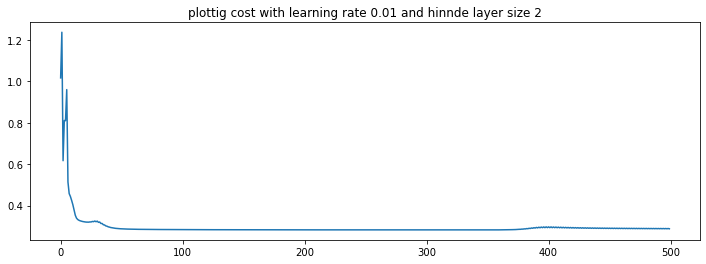

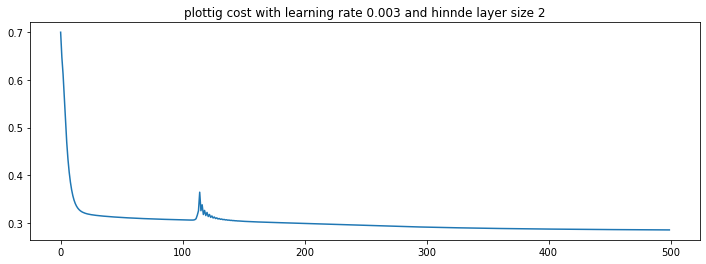

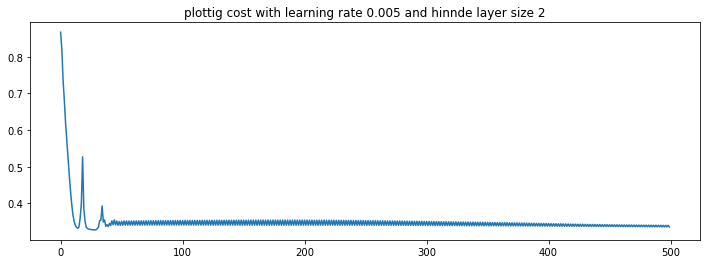

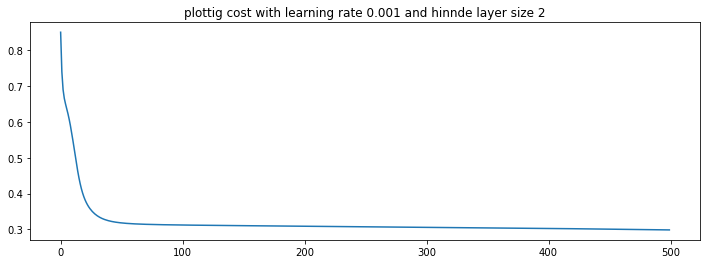

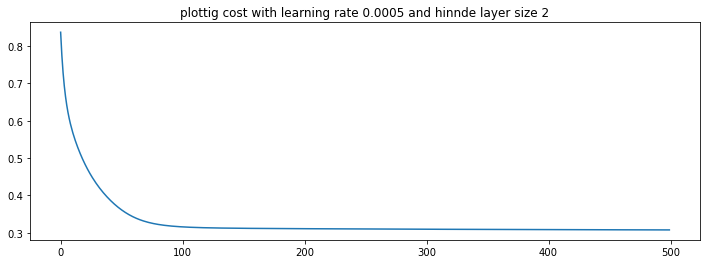

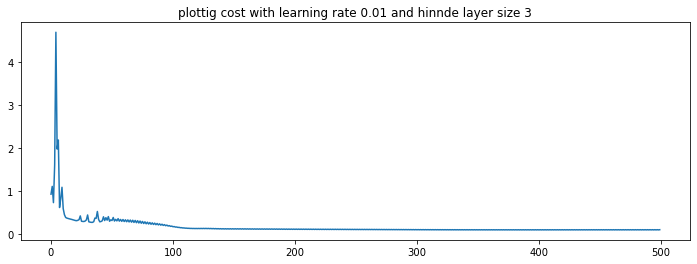

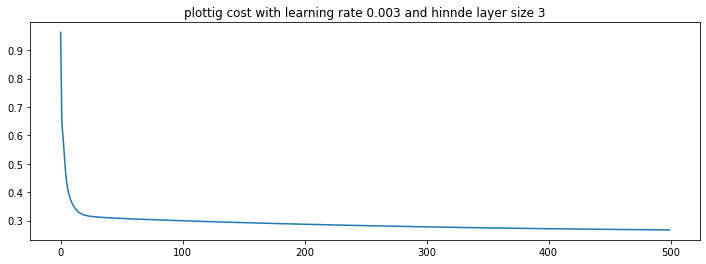

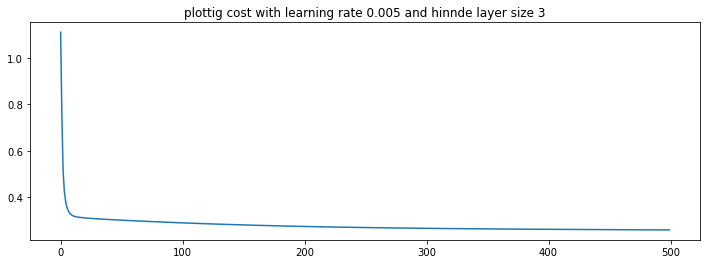

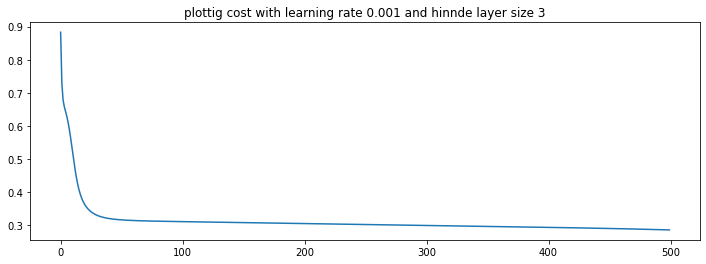

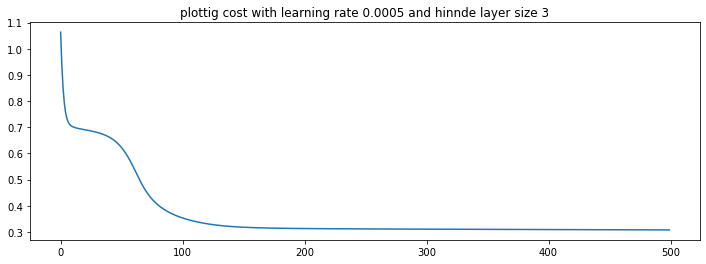

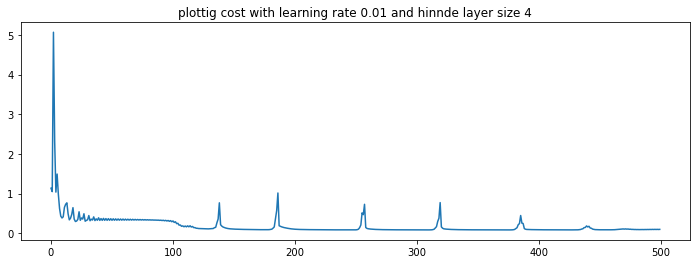

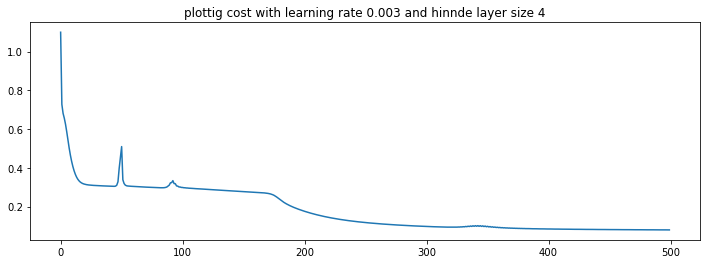

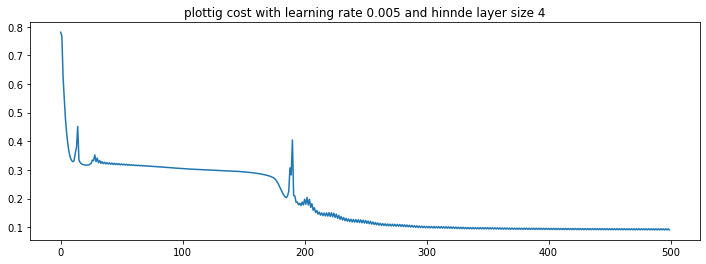

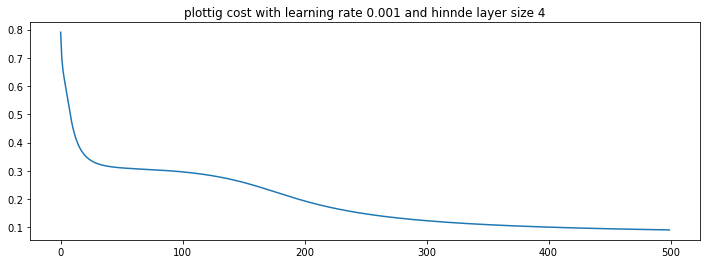

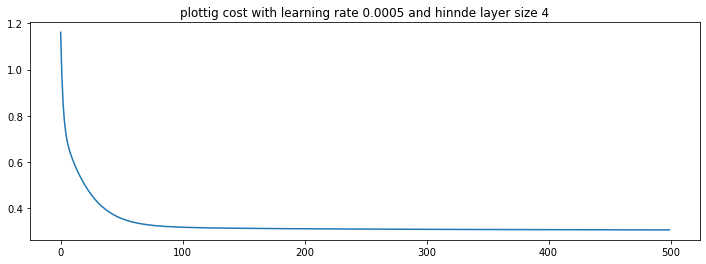

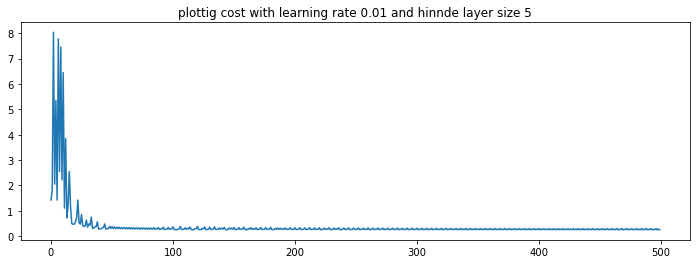

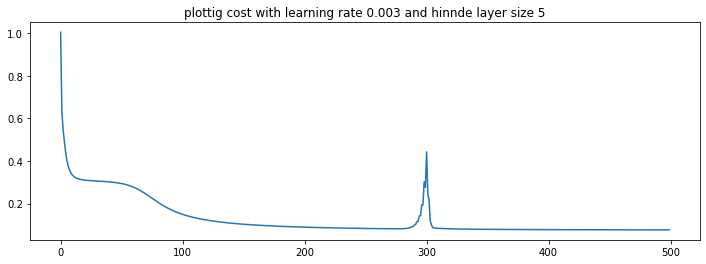

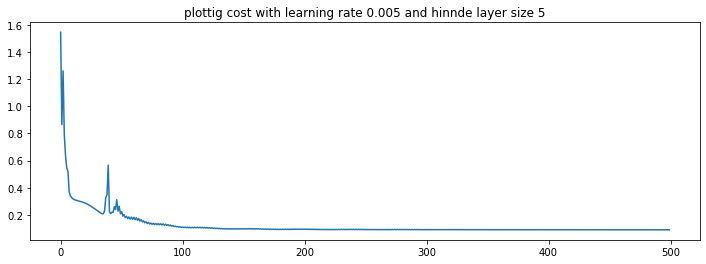

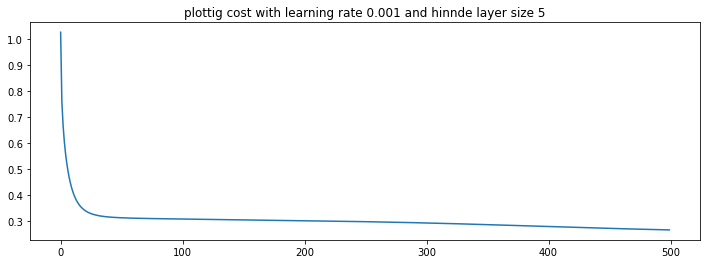

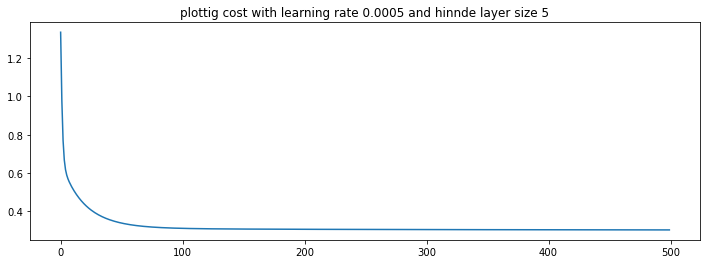

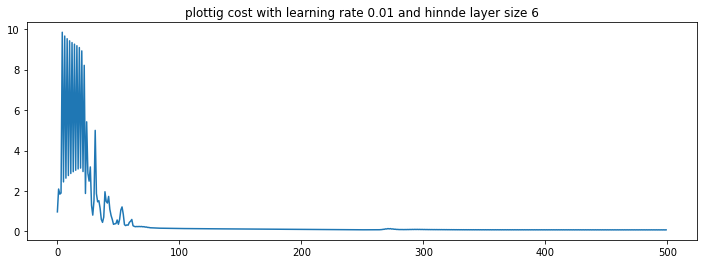

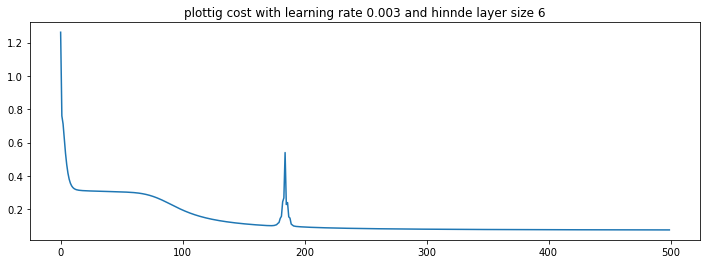

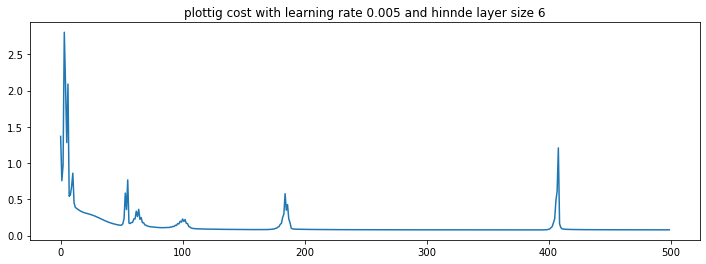

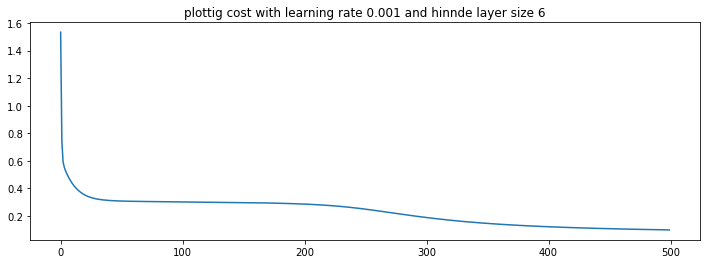

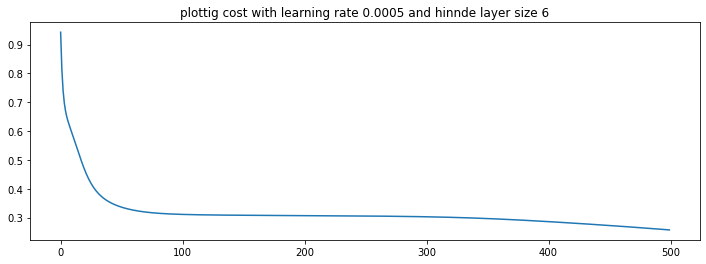

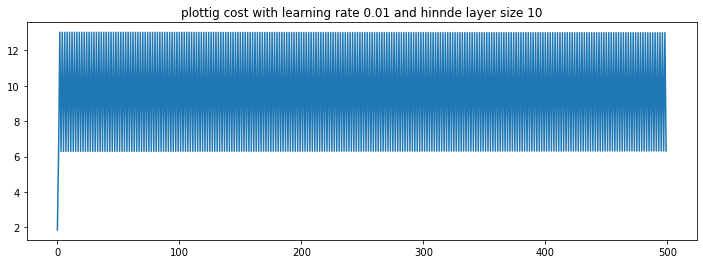

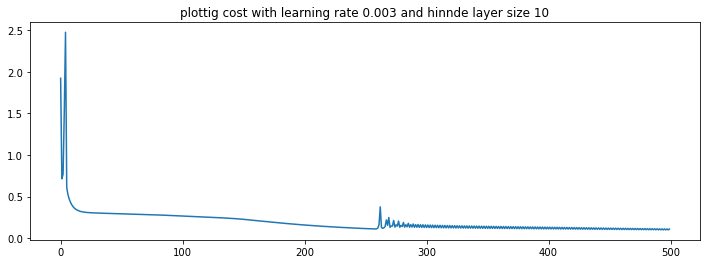

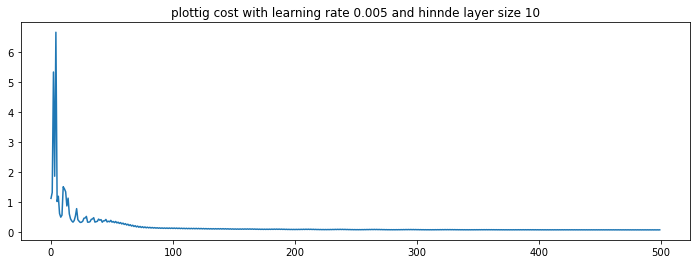

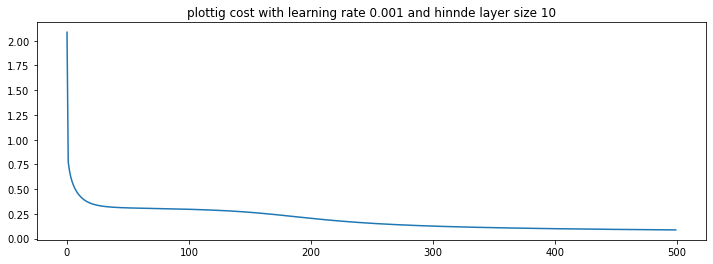

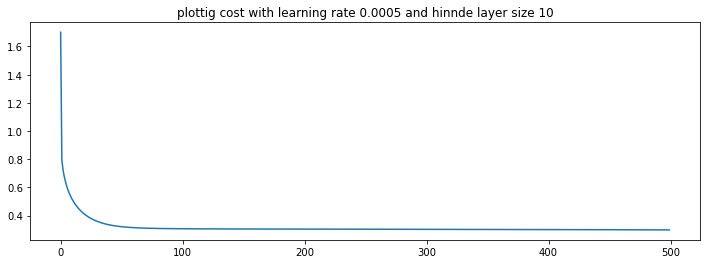

In [8]:
learning_rates = [0.01,0.003,0.005,0.001,0.0005]

metrics = {'learning_rate':[],'hidden_layers':[],'train_accuracy':[],'test_accuracy':[]}

hidden_layers = [2,3,4,5,6,10]

for n in hidden_layers:
    for lr in learning_rates:  # different learning rates

        cost_list = []
        p = NeuralNetwork(X_train,n,y_train,lr,0.003)  # creating object

        for epoch in range(0,500): # training for  500 epochs 

            p.forward_prop() # forward propagation 
            p.backward_prop() # backward propagation 
            cost_list.append(p.cost()) #apending cost after every epoch to a list 

        plt.figure(figsize=(12,4)) # plotting cost for every learning rate
        x_vals = list(range(500))
        sns.lineplot(x=x_vals,y=cost_list)
        plt.title(f'plottig cost with learning rate {lr} and hinnde layer size {n}')

        y_train_preds = p.predict(X_train)  # converting output of sigmoid into predictions

        y_test_preds = p.predict(X_test)

        train_accuracy = accuracy_score(y_train,y_train_preds)
        test_accuracy = accuracy_score(y_test,y_test_preds)

        # adding to dictionary
        metrics['learning_rate'].append(lr)
        metrics['hidden_layers'].append(n)
        metrics['train_accuracy'].append(train_accuracy)
        metrics['test_accuracy'].append(test_accuracy)

In [9]:
metrics = pd.DataFrame(metrics)
metrics

,learning_rate,hidden_layers,train_accuracy,test_accuracy
0,0.0100,2,0.837143,0.833333
1,0.0030,2,0.847143,0.886667
2,0.0050,2,0.844286,0.876667
3,0.0010,2,0.860000,0.896667
4,0.0005,2,0.861429,0.896667
5,0.0100,3,0.962857,0.966667
6,0.0030,3,0.845714,0.886667
7,0.0050,3,0.828571,0.873333
8,0.0010,3,0.858571,0.900000
9,0.0005,3,0.860000,0.896667
